<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/4_Scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2


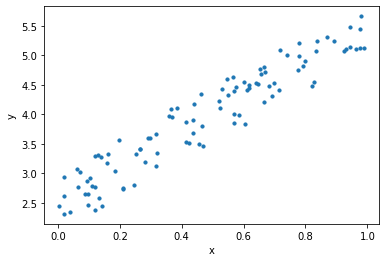

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### These errors are also called as residuals. 


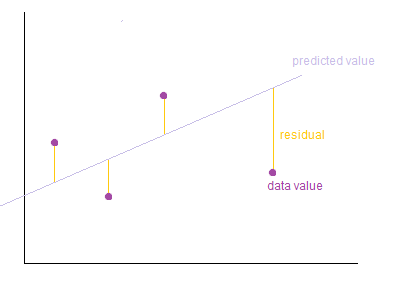

In [2]:
# imports
import numpy as np


class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.

    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set

    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration

    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data

        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values

        Returns
        -------
        self : object

        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.

        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples

        Returns
        -------
        Predicted value

        """
        return np.dot(x, self.w_)

### The coefficient is [2.89114079]
### The intercept is [2.58109277]

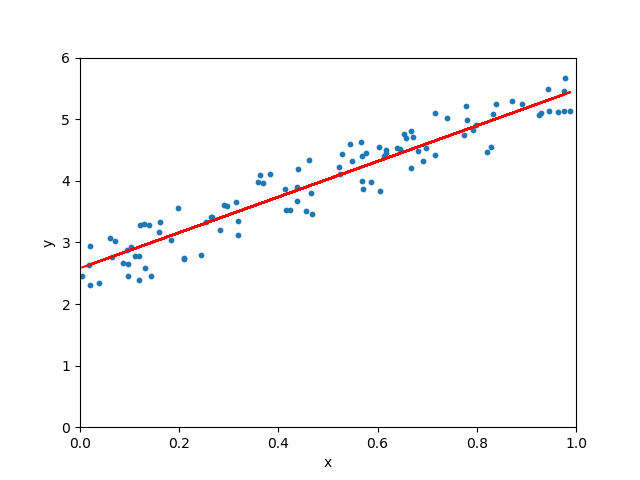

### Evaluating the performance of the model
We will be using Root mean squared error(RMSE) and Coefficient of Determination(R² score) to evaluate our model.
RMSE is the square root of the average of the sum of the squares of residuals.

In [ ]:
# mean squared error
mse = np.sum((y_pred - y_actual)**2)

# root mean squared error
# m is the number of training examples
rmse = np.sqrt(mse/m)

### R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.

In [ ]:

# sum of square of residuals
ssr = np.sum((y_pred - y_actual)**2)

#  total sum of squares
sst = np.sum((y_actual - np.mean(y_actual))**2)

# R2 score
r2_score = 1 - (ssr/sst)

### Scikit-learn implementation

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


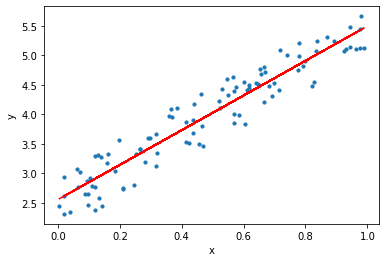

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()